In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from rfpimp import *
rent = pd.read_csv("data/rent-ideal.csv")

In [47]:
print(rent.head(10))

   bedrooms  bathrooms  latitude  longitude  price
0         1        1.0   40.7108   -73.9539   2400
1         2        1.0   40.7513   -73.9722   3800
2         2        1.0   40.7575   -73.9625   3495
3         3        1.5   40.7145   -73.9425   3000
4         0        1.0   40.7439   -73.9743   2795
5         3        1.0   40.7348   -73.9865   7200
6         3        2.0   40.7302   -73.9826   6000
7         0        1.0   40.7769   -73.9467   1945
8         1        0.0   40.7346   -73.9811   2435
9         3        3.0   40.6990   -73.9943   6850


In [48]:
prices = rent["price"]
avg_rent = prices.mean()
print(f"Average rent of the flats are ${avg_rent:.0f}")

Average rent of the flats are $3438


In [49]:
bybaths = rent.groupby(["bathrooms"]).mean()
bybaths = bybaths.reset_index()  #Overcome quirks in pandas
print(bybaths[["bathrooms","price"]]) #print just number baths,avg price

   bathrooms        price
0        0.0  3144.870000
1        1.0  3027.007118
2        1.5  4226.336449
3        2.0  5278.595739
4        2.5  6869.047368
5        3.0  6897.974576
6        3.5  7635.357143
7        4.0  7422.888889
8        4.5  2050.000000
9       10.0  3600.000000


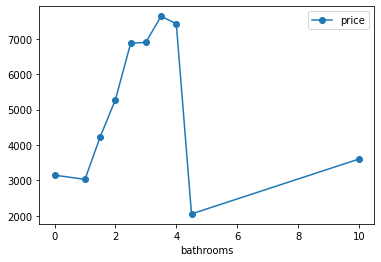

In [50]:
bybaths.plot.line("bathrooms","price",style="-o")
plt.show()

In [51]:
X , y = rent[["bedrooms","bathrooms","latitude","longitude"]],rent["price"]
print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [52]:
rf = RandomForestRegressor(n_estimators = 10) # Use 10 trees
rf.fit(X, y)

RandomForestRegressor(n_estimators=10)

In [53]:
unknown_x = [2, 1, 40.7957, -73.97] # 2 bedrooms, 1 bathroom, ...

In [54]:
predicted_y = rf.predict([unknown_x])
print(predicted_y)

[4499.08010878]


In [55]:
predictions = rf.predict(X)
e = mean_absolute_error(y, predictions)
ep = e*100.0/y.mean()
print(F"average error is -> ${e:.0f} and {ep:.2f}% is the error percent")

average error is -> $189 and 5.51% is the error percent


In [56]:
X, y = rent[["latitude","longitude"]], rent["price"]
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X,y)
location_e = mean_absolute_error(y,rf.predict(X))
location_ep = location_e*100/y.mean()
print(f"${location_e:.0f} is the mean absolute error and {location_ep:.2f}% is the error percent")

$519 is the mean absolute error and 15.09% is the error percent


In [57]:
X,y = rent[["bedrooms","bathrooms","latitude","longitude"]],rent["price"]

#20% of the data goes into the test set and 80% into the training set

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train,y_train)

validation_e = mean_absolute_error(y_test,rf.predict(X_test))
validation_ep = validation_e*100/y.mean()

print(f"${validation_e:.0f} is the average error and {validation_ep:.2f}% is the error percentage")

$295 is the average error and 8.58% is the error percentage


In [58]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train,y_train)
I = importances(rf,X_test,y_test)
I

Importance
Feature              
longitude    0.559142
bedrooms     0.502591
latitude     0.466962
bathrooms    0.462947

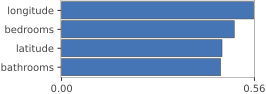

In [60]:
plot_importances(I,color = '#4575b4',vscale = 1.8)

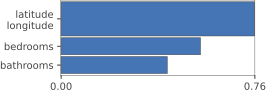

In [61]:
I = importances(rf, X_test, y_test,
               features = ['bedrooms','bathrooms',['latitude','longitude']])
plot_importances(I, color = '#4575b4', vscale = 1.8)